In [1]:
import numpy as np
import pandas as pd
import hydrogen as hy

results: list[hy.HChainResult] = []
bond_lengths = np.arange(0.5, 2, 1)

for bond_length in bond_lengths:
    cfg = hy.HChainConfig(n_atoms=10, bond_length=bond_length)
    res = hy.calculate_h_chain_energies(cfg)
    results.append(res)

df = pd.DataFrame([res.model_dump() for res in results])

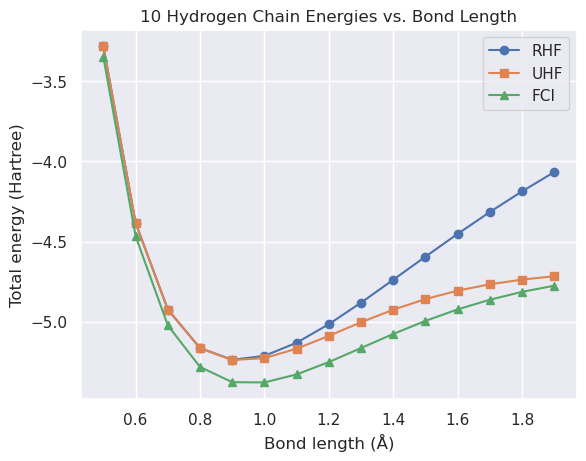

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()

plt.plot(df["bond_length"], df["rhf_energy"], marker="o", label="RHF")
plt.plot(df["bond_length"], df["uhf_energy"], marker="s", label="UHF")
plt.plot(df["bond_length"], df["fci_energy"], marker="^", label="FCI")

plt.xlabel("Bond length (Å)")
plt.ylabel("Total energy (Hartree)")
plt.title("10 Hydrogen Chain Energies vs. Bond Length")
plt.legend()
plt.grid(True)
plt.show()